# Naive Bayes classification
- Supervised Learning
- quick and dirty

### One hundred  random data (X1, X2)
- 2 labels
- standard deviation = 1.5

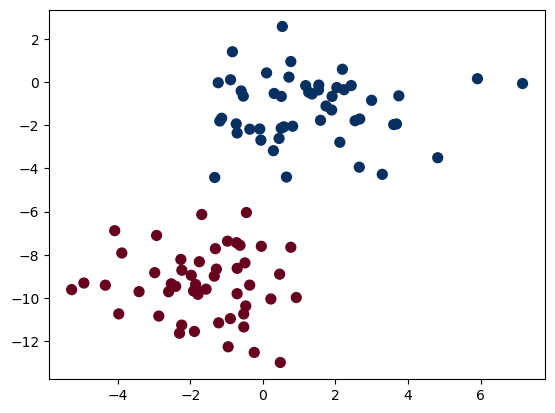

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X, y = make_blobs (100, 2, centers = 2 , random_state=2, cluster_std=1.5)
plt.scatter(X[:,0], X[:, 1], c=y, s = 50 , cmap='RdBu');

# Bayesian Classification
- Probability of a label given some observed features

array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

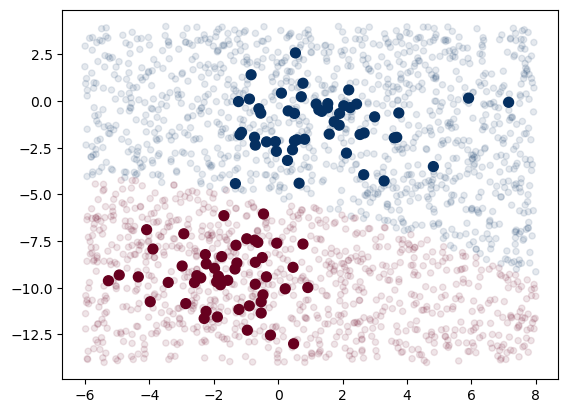

In [2]:
import numpy as np 
from sklearn.naive_bayes import GaussianNB


# 1. Create Model based on training data (X,y)
model = GaussianNB() 
model.fit(X, y);

# 2. Create test data
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)


# 3. Create a scatter plot of training (bold) & test data 
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
plt.scatter(Xnew[:,0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)


# Probability of test data being Label 1 or Label 2
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)


# Multinomial Naive Bayes
- Proability of observing counts among a number of categories

In [3]:
#  Data = list of documents + 20 news topics
from sklearn.datasets import fetch_20newsgroups 
data = fetch_20newsgroups() 
print(data.target_names)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [4]:
# Train & Test data based on 4 topics
categories = ['talk.religion.misc', 'soc.religion.christian', 
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups (subset='train', categories=categories) 
test = fetch_20newsgroups (subset='test', categories=categories)

print(train.data[6])

From: will@rins.ryukoku.ac.jp (William Reiken)
Subject: Re: nuclear waste
Organization: Ryukoku Univ., Seta, Japan
Lines: 4


	Thanks for the Update.

							Will...



In [5]:
# (Label of Doc at Index 1, total Train Doc, total Test Doc)
train.target[6], len(train.data),len(test.data)

(1, 2153, 1432)

# Multinomial distribution
- probability of counts for each side of k sided die rolled n times

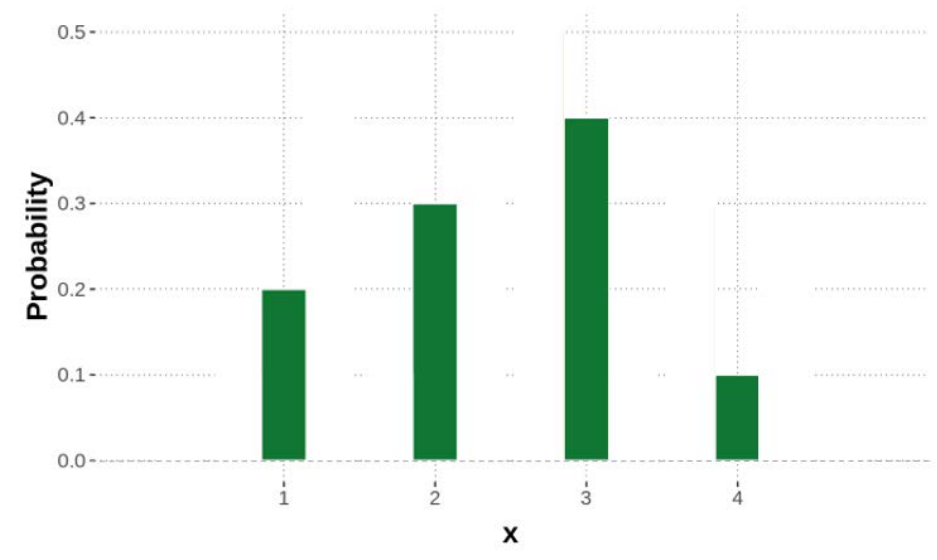

# Categorical Distribution
- 3 types of 4 sided die rolled n times

</br> 

### Example 
**X** : 단어 1,2,3,4 </br> 
**X Categorical**: 과학, 종교, 정치</br></br> </br> 

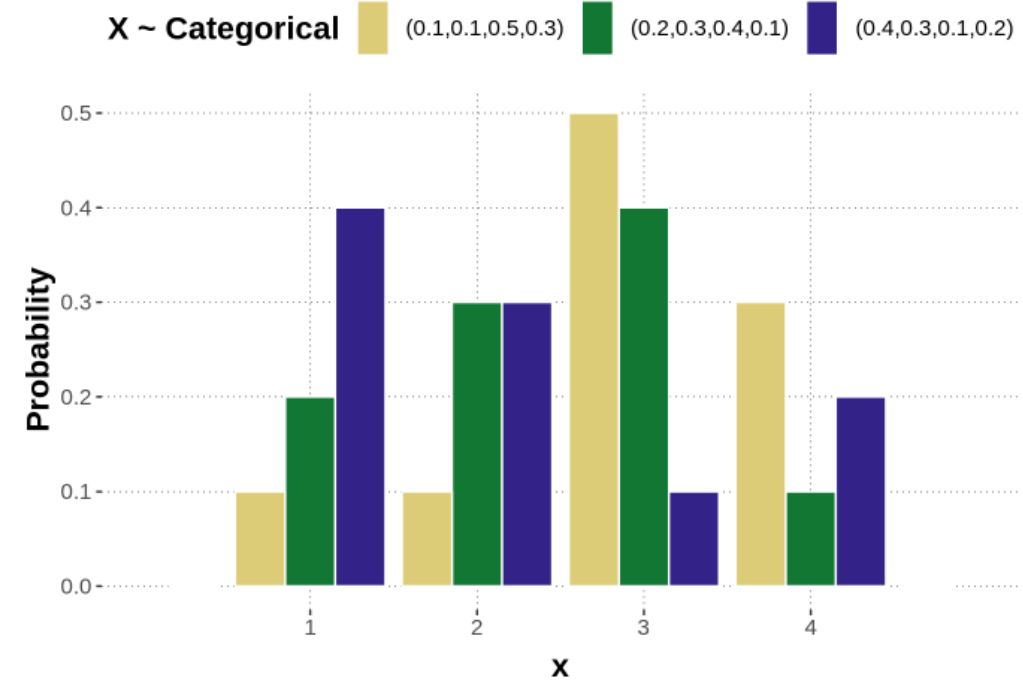

# Multinomial Naive Bayes Classifier
- Text --> TF-IDF (vector of numbers) --> NB --> Prediction 

**Confusion Matrix Example**

In [6]:
from sklearn.metrics import confusion_matrix
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]
confusion_matrix(y_true, y_pred)

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]], dtype=int64)

**Application of Multinomial Naive Bayes Classifier**

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

# 1. Create a vectorizer model with training data
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(train.data, train.target)

# 2. Make label prediction of test data with model
labels = model.predict(test.data)

# 3. Visualize prediction result using confusion matrix
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
mat

array([[344,  13,  32,   0],
       [  6, 364,  24,   0],
       [  1,   5, 392,   0],
       [  4,  12, 187,  48]], dtype=int64)

**Creating Heatmap of Label Prediction**

Text(110.44999999999996, 0.5, 'predicted label')

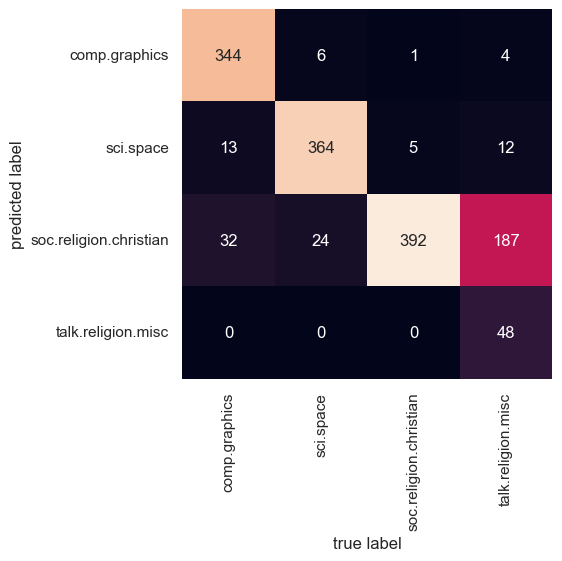

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, 
            xticklabels=train.target_names, 
            yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

**Predicting category of any text**

In [15]:
def predict_category(s, train=train, model=model): 
    pred = model.predict([s])
    return train.target_names [pred[0]]

predict_category('sending a payload to the ISS')

'sci.space'

In [16]:
predict_category('discussing islam vs atheism')

'soc.religion.christian'

In [17]:
predict_category('determining the screen resolution')

'comp.graphics'